## How does SAR work?
SAR is a Radar: a beam of energy is emitted from an antenna. As they strike objects the energy is scattered in all directions with some of the energy reflected directly back to the radar. 

Synthetic Aperture Radar: uses the motion of the radar antenna over a target region to provide finer spatial resolution than conventional beam-scanning radars.

![image.png](attachment:9affd91c-08b4-4dc1-9c5e-0211fcb2b8a8.png)

Images are not very intuitive because we are not used to see them. They have geometric distortions and the pixel value is completely different to what we see with our eyes (or with optical sensors).

![image.png](attachment:a4dbd964-e471-4983-a92e-3bc8fb6efe88.png)

The pixel values are proportional to the amount of energy received and it depends on the amount of energy the SAR sensor transmitted, the properties and shape of the object and the angle from which the object is viewed.

## SAR image example 

TODO: show a couple of images for simple interpretation examplea:

-  e.g. foreshortening and layover
-  cloudy example S1 vs S2

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from helpers import *

# Example in Niamey

In [ ]:
img_data1=load_image('data/backscatterNiamey20180130.tif')
plot_bands_row(img_data1,vmin=0,vmax=0.5)

# Example in Amazonas - Brasil

Time series of images available in https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/ for fire monitoring.

Each tif file has three bands:
* Backscatter at date 1
* Backscatter at date 2
* Coherence date 1 - date 2 (will be explained later)

In this kind of vegetation, it is possible to see a decrease of backscatter of the burned area with respect to the not burned.
In the examples, the rivers have a very low backscatter. The areas without vegetation has a lower backscatter than the vegetated ones.

TODO - Add RGB example with S2 of the same area.

/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/s1Burned/CCD_20200621T091832_20200703T091832.tif
/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/s1Burned/CCD_20200901T091836_20200913T091836.tif


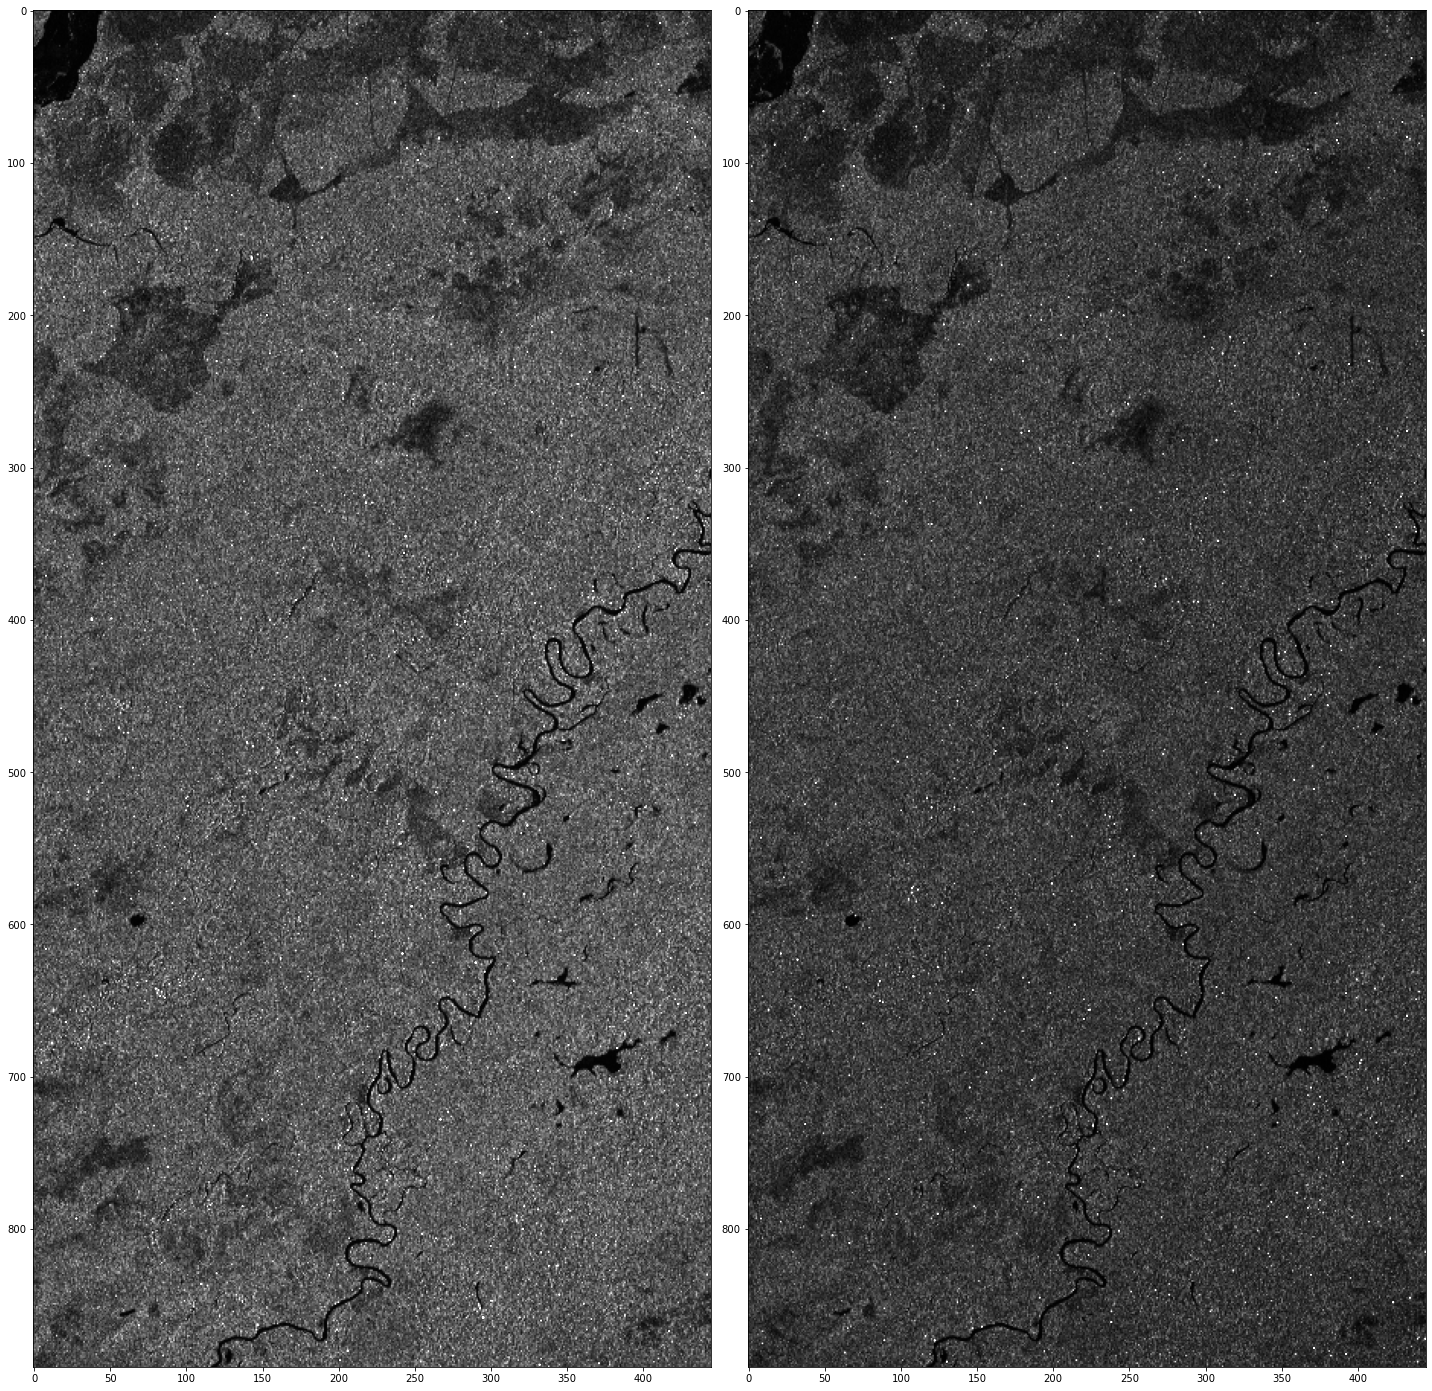

In [4]:
s1Burned1= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200621T091832_20200703T091832.tif'
s1Burned2= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200715T091833_20200727T091834.tif'
s1Burned3= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200808T091834_20200820T091835.tif'
s1Burned4= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200901T091836_20200913T091836.tif'
aoi_bbox = '-56.6,-16.95,-56.4,-16.5'
aoi = [float(coord) for coord in aoi_bbox.split(',')]
img_data1 = vsi_download(s1Burned1, aoi)
img_data4 = vsi_download(s1Burned4, aoi)
layers = []
layers.append(img_data1[:,:,0])
layers.append(img_data4[:,:,0])
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=0.5)

In [ ]:
print(img_data.shape)

fig = plt.figure(figsize=(20,20))
a=fig.add_subplot(1, 1, 1)
a.set_title('titulo')
width = 12
height = 12
data = img_data
    
imgplot = plt.imshow(data.reshape(data.shape[0],data.shape[1]), cmap=plt.cm.gray) #, vmin=-5, vmax=15)

plt.tight_layout()
fig = plt.gcf()
plt.show()

fig.clf()
plt.close()